# Exploring the CoralHydro2k database with (free) Python tools


In this notebook we illustrate how to load, manipulate and visualize data from the CoralHydro2k database, version 1. The data are formatted as Linked Paleo Data ([LiPD](https://lipd.net)).

## 1. Accessing the data

There are several ways of accessing the data, but the easiest is through the [LiPDverse](https://lipdverse.org), which hosts a zipped folder containing all the LiPD files.  

In [1]:
# download and unzip the dataset in LiPD
!wget https://lipdverse.org/CoralHydro2k/current_version/CoralHydro2k0_5_4.zip
!unzip CoralHydro2k0_5_4.zip -d lipd_files

--2022-12-09 09:13:02--  https://lipdverse.org/CoralHydro2k/current_version/CoralHydro2k0_5_4.zip
Resolving lipdverse.org (lipdverse.org)... 134.114.138.41
Connecting to lipdverse.org (lipdverse.org)|134.114.138.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1409671 (1.3M) [application/zip]
Saving to: ‘CoralHydro2k0_5_4.zip’

CoralHydro2k0_5_4.z 100%[===================>]   1.34M  5.74MB/s    in 0.2s    

2022-12-09 09:13:03 (5.74 MB/s) - ‘CoralHydro2k0_5_4.zip’ saved [1409671/1409671]

Archive:  CoralHydro2k0_5_4.zip
  inflating: lipd_files/AB08MEN01.lpd  
  inflating: lipd_files/AB15BHB01.lpd  
  inflating: lipd_files/AB20MEN01.lpd  
  inflating: lipd_files/AB20MEN02.lpd  
  inflating: lipd_files/AB20MEN03.lpd  
  inflating: lipd_files/AB20MEN04.lpd  
  inflating: lipd_files/AB20MEN05.lpd  
  inflating: lipd_files/AB20MEN06.lpd  
  inflating: lipd_files/AB20MEN07.lpd  
  inflating: lipd_files/AB20MEN08.lpd  
  inflating: lipd_files/AB20MEN09.lpd  
  infl

## 2. Loading into Pyleoclim

There are seeral ways to explore this dataset. Here we use the [Pyleoclim](https://github.com/LinkedEarth/Pyleoclim_util) package, described in [Khider et al (2022)](https://doi.org/10.1029/2022PA004509). A gentle tutorial on how to use the package is available [here](http://linked.earth/PyleoTutorials/intro.html), and served as the inspiration for much of what follows.  
We first import the package and load the files:

In [2]:
import pyleoclim as pyleo
ch2k = pyleo.Lipd('./lipd_files/')

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 179 LiPD file(s)
reading: KA17RYU01.lpd
reading: CH18YOA02.lpd
reading: FL17DTO02.lpd
reading: BO14HTI01.lpd
reading: AB20MEN01.lpd
reading: DR99ABR01.lpd
reading: OS13NLP01.lpd
reading: ZI04IFR01.lpd
reading: CH18YOA01.lpd
reading: FL17DTO01.lpd
reading: SA16CLA01.lpd
reading: AB20MEN03.lpd
reading: TU01DEP01.lpd
reading: BO14HTI02.lpd
reading: AB20MEN02.lpd
reading: CO00MAL01.lpd
reading: SW98STP01.lpd
reading: AB20MEN06.lpd
reading: AB08MEN01.lpd
reading: RE18CAY01.lpd
reading: HE13MIS02.lpd
reading: CA13SAP01.lpd
reading: MO06PED01.lpd
reading: AB20MEN07.lpd
reading: DR00NBB01.lpd
reading: ZI16ROD01.lpd
reading: DR00KSB01.lpd
reading: ZI15MER01.lpd
reading: NU09KIR01.lpd
reading: KU00NIN01.lpd
reading: PF19LAR01.lpd
reading: AB20MEN05.lpd
reading: HE13MIS01.lpd
reading: HE10GUA01.lpd
reading: EV18ROC01.lpd
reading: AB20MEN04.lpd
reading: CA07FLI01.lpd
reading: SH92PUN01.lpd
reading: ZI16ROD02.lpd
read

Let us map the site locations:

(<Figure size 640x480 with 1 Axes>, <GeoAxesSubplot:>)

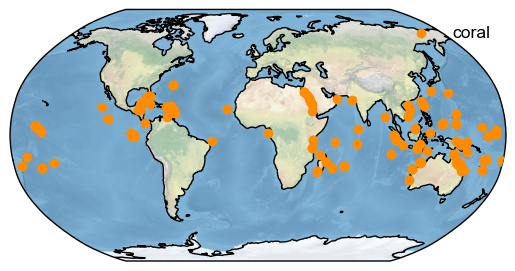

In [3]:
ch2k.mapAllArchive()

Next we extract the underlying timeseries:

In [4]:
ts_SeriesList = ch2k.to_LipdSeriesList()

extracting paleoData...
extracting: KA17RYU01
extracting: CH18YOA02
extracting: FL17DTO02
extracting: BO14HTI01
extracting: AB20MEN01
extracting: DR99ABR01
extracting: OS13NLP01
extracting: ZI04IFR01
extracting: CH18YOA01
extracting: FL17DTO01
extracting: SA16CLA01
extracting: AB20MEN03
extracting: TU01DEP01
extracting: BO14HTI02
extracting: AB20MEN02
extracting: CO00MAL01
extracting: SW98STP01
extracting: AB20MEN06
extracting: AB08MEN01
extracting: RE18CAY01
extracting: HE13MIS02
extracting: CA13SAP01
extracting: MO06PED01
extracting: AB20MEN07
extracting: DR00NBB01
extracting: ZI16ROD01
extracting: DR00KSB01
extracting: ZI15MER01
extracting: NU09KIR01
extracting: KU00NIN01
extracting: PF19LAR01
extracting: AB20MEN05
extracting: HE13MIS01
extracting: HE10GUA01
extracting: EV18ROC01
extracting: AB20MEN04
extracting: CA07FLI01
extracting: SH92PUN01
extracting: ZI16ROD02
extracting: RA20TAI01
extracting: CH03BUN01
extracting: MU18RED02
extracting: TU01LAI01
extracting: NU11PAL01
extracti

All these records have a variable called "year", which really should be treated as the time axis. We write a little loop to skip over them:

In [5]:
ts_list = ch2k.to_tso()  # export LiPD objects to timeseries objects
indices = [] # initiate an empty list in which to store the relevant indices
for idx, item in enumerate(ts_list):  # loop over series
    if item['paleoData_variableName'] != 'year': # ignore that pesky variable.
        indices.append(idx)  # update list

extracting paleoData...
extracting: KA17RYU01
extracting: CH18YOA02
extracting: FL17DTO02
extracting: BO14HTI01
extracting: AB20MEN01
extracting: DR99ABR01
extracting: OS13NLP01
extracting: ZI04IFR01
extracting: CH18YOA01
extracting: FL17DTO01
extracting: SA16CLA01
extracting: AB20MEN03
extracting: TU01DEP01
extracting: BO14HTI02
extracting: AB20MEN02
extracting: CO00MAL01
extracting: SW98STP01
extracting: AB20MEN06
extracting: AB08MEN01
extracting: RE18CAY01
extracting: HE13MIS02
extracting: CA13SAP01
extracting: MO06PED01
extracting: AB20MEN07
extracting: DR00NBB01
extracting: ZI16ROD01
extracting: DR00KSB01
extracting: ZI15MER01
extracting: NU09KIR01
extracting: KU00NIN01
extracting: PF19LAR01
extracting: AB20MEN05
extracting: HE13MIS01
extracting: HE10GUA01
extracting: EV18ROC01
extracting: AB20MEN04
extracting: CA07FLI01
extracting: SH92PUN01
extracting: ZI16ROD02
extracting: RA20TAI01
extracting: CH03BUN01
extracting: MU18RED02
extracting: TU01LAI01
extracting: NU11PAL01
extracti

In [6]:
len(indices)

304

Let's create a downsized list from those series that exclude "year":

In [7]:
ts_list_noyear =[]
for i in indices:
    ts_list_noyear.append(pyleo.LipdSeries(ts_list[i]))

Now we plot the first 20 records as a [stackplot](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.stackplot):

(<Figure size 640x480 with 21 Axes>,
 {0: <Axes:ylabel='SrCa [mmol/mol]'>,
  1: <Axes:ylabel='SrCa [mmol/mol]'>,
  2: <Axes:ylabel='SrCa [mmol/mol]'>,
  3: <Axes:ylabel='SrCa_annual [mmol/mol]'>,
  4: <Axes:ylabel='d18O [permil]'>,
  5: <Axes:ylabel='SrCa [mmol/mol]'>,
  6: <Axes:ylabel='SrCaUncertainty [mmol/mol]'>,
  7: <Axes:ylabel='d18O [permil]'>,
  8: <Axes:ylabel='d18O [permil]'>,
  9: <Axes:ylabel='d18O_annual [permil]'>,
  10: <Axes:ylabel='d18O [permil]'>,
  11: <Axes:ylabel='d18O [permil]'>,
  12: <Axes:ylabel='SrCa [mmol/mol]'>,
  13: <Axes:ylabel='SrCa [mmol/mol]'>,
  14: <Axes:ylabel='SrCa [mmol/mol]'>,
  15: <Axes:ylabel='SrCa_annual [mmol/mol]'>,
  16: <Axes:ylabel='d18O [permil]'>,
  17: <Axes:ylabel='d18O [permil]'>,
  18: <Axes:ylabel='d18O [permil]'>,
  19: <Axes:ylabel='d18O [permil]'>,
  20: <Axes:xlabel='Year [AD]'>})

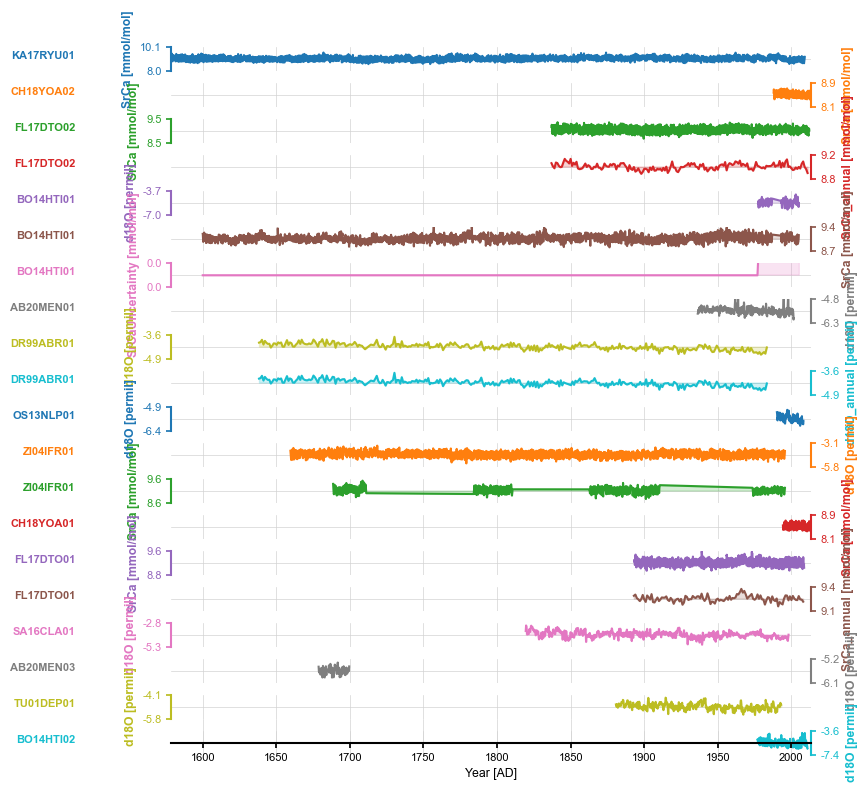

In [8]:
ms = pyleo.MultipleSeries(ts_list_noyear[:20])
ms.stackplot(v_shift_factor=1.5)

If you wanted to plot a [dashboard](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.lipdseries.LipdSeries.dashboard) for a given site, all you have to do is this:

Performing spectral analysis on individual series: 100%|████████████████████████████| 200/200 [08:06<00:00,  2.43s/it]


(<Figure size 1100x800 with 4 Axes>,
 {'ts': <AxesSubplot:xlabel='Year [AD]', ylabel='SrCa [mmol/mol]'>,
  'dts': <AxesSubplot:xlabel='Counts'>,
  'map': <GeoAxesSubplot:>,
  'spec': <AxesSubplot:xlabel='Period [yrs]', ylabel='PSD'>})

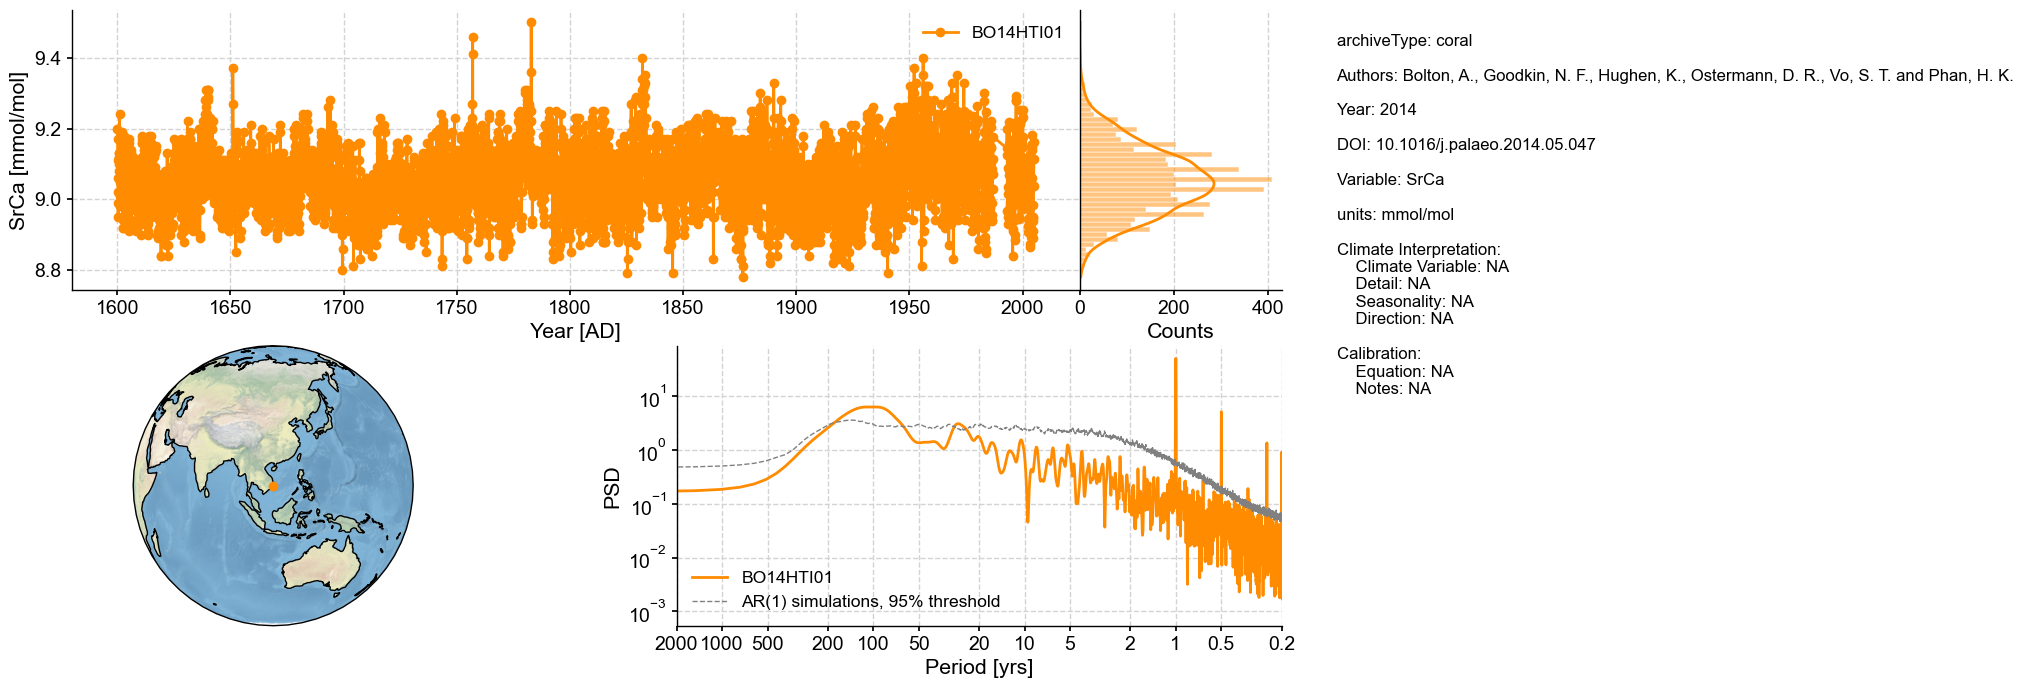

In [9]:
ts = ts_list_noyear[5] # select the 6th record (remember, Python indexing is 0-based)
ts.dashboard()

This is a very long series (~400 years) at monthly resolution, where the annual cycle and its higher-order harmonics are prominent. 

It is easy to loop over records and export the figures to png or pdf format. In the interest of time, we do so only for the first 5 records:

Performing spectral analysis on individual series: 100%|████████████████████████████| 200/200 [00:17<00:00, 11.63it/s]
Performing spectral analysis on individual series: 100%|███████████████████████████| 200/200 [00:00<00:00, 263.37it/s]
Performing spectral analysis on individual series: 100%|████████████████████████████| 200/200 [01:45<00:00,  1.90it/s]
Performing spectral analysis on individual series: 100%|███████████████████████████| 200/200 [00:00<00:00, 226.16it/s]
Performing spectral analysis on individual series: 100%|███████████████████████████| 200/200 [00:01<00:00, 124.27it/s]


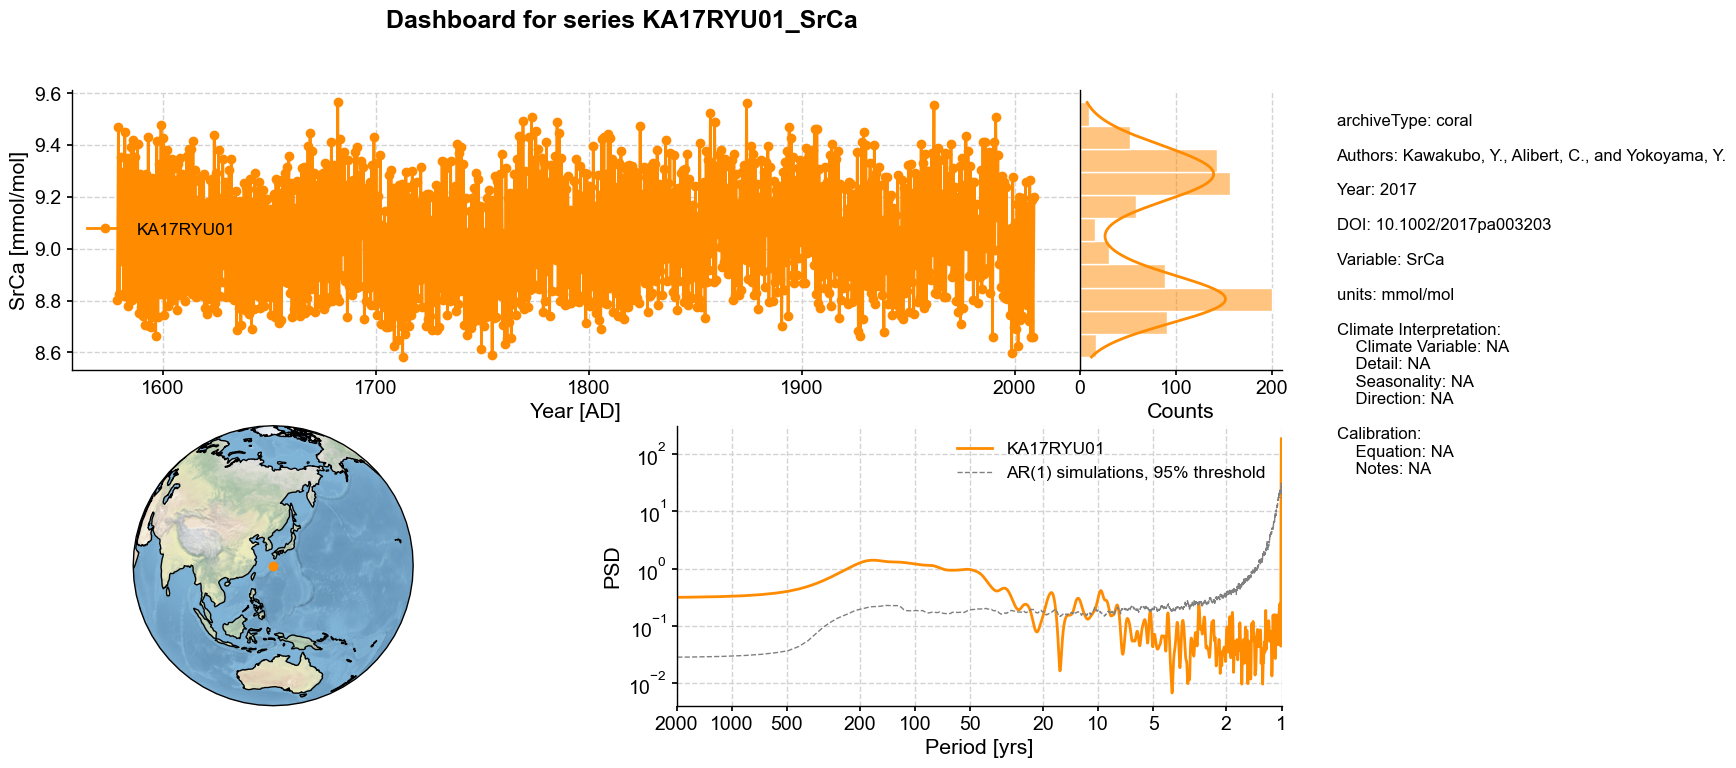

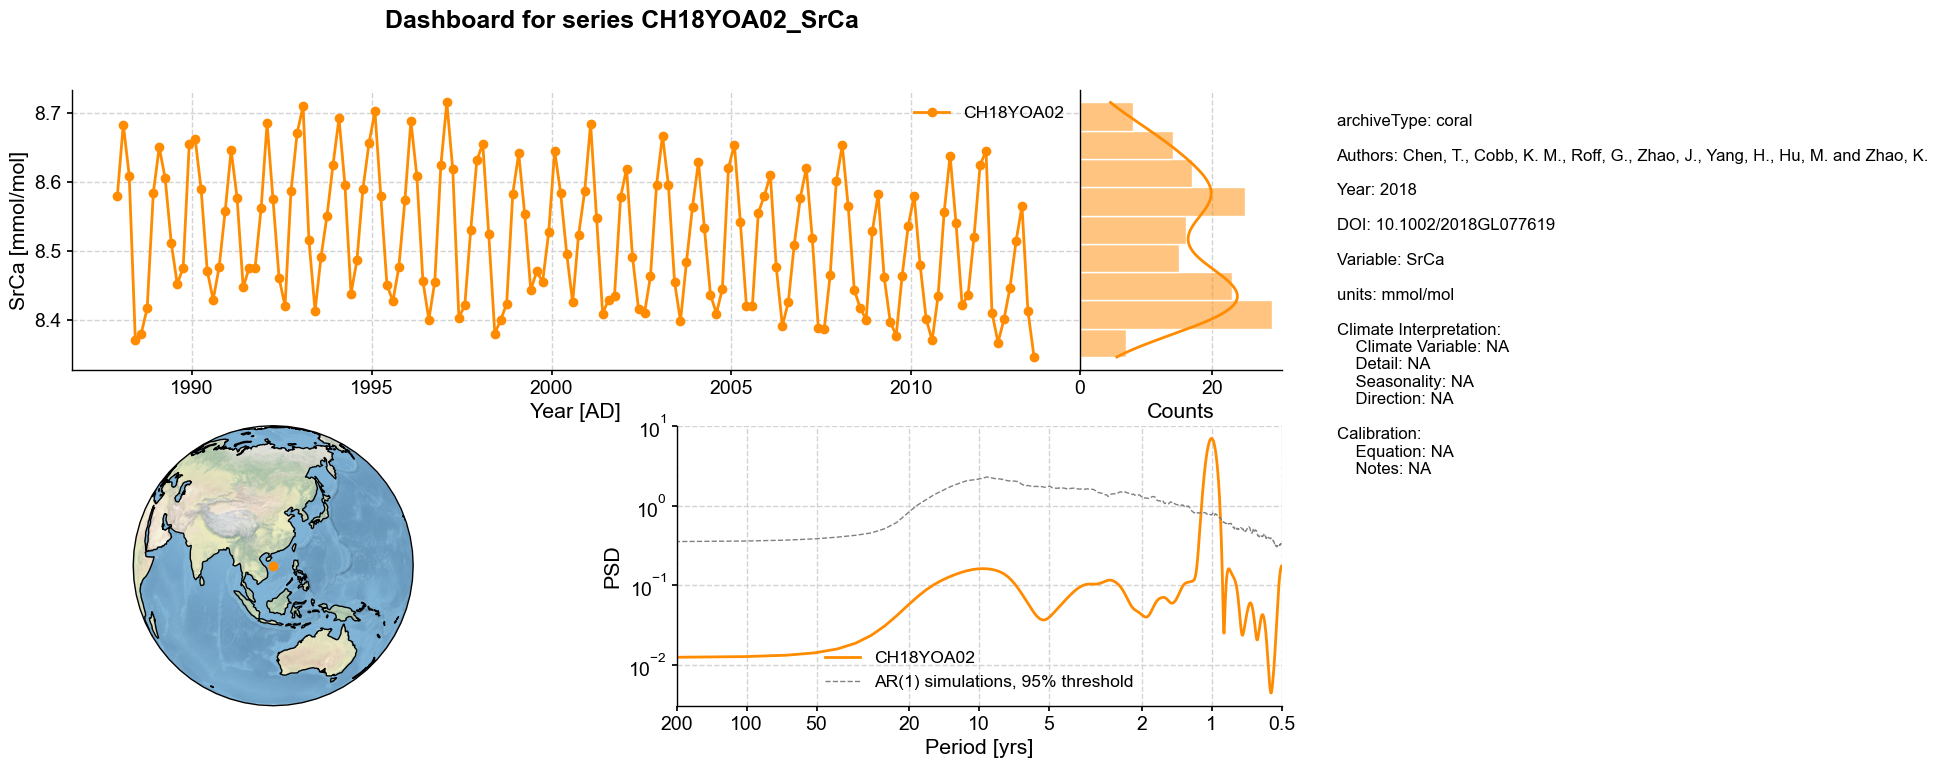

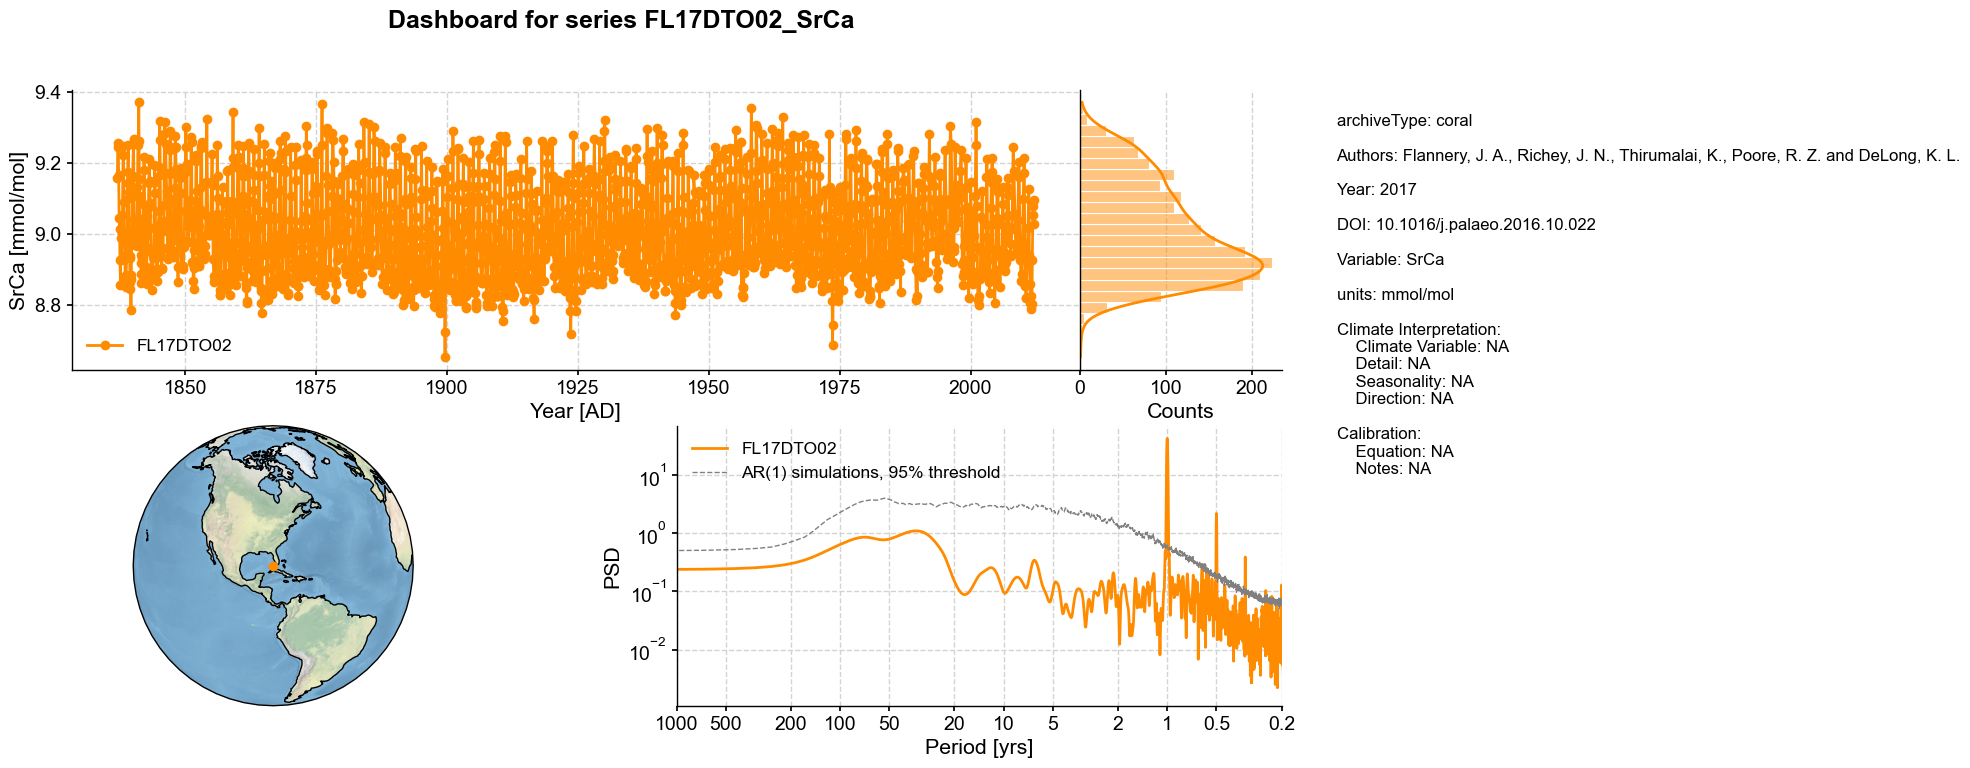

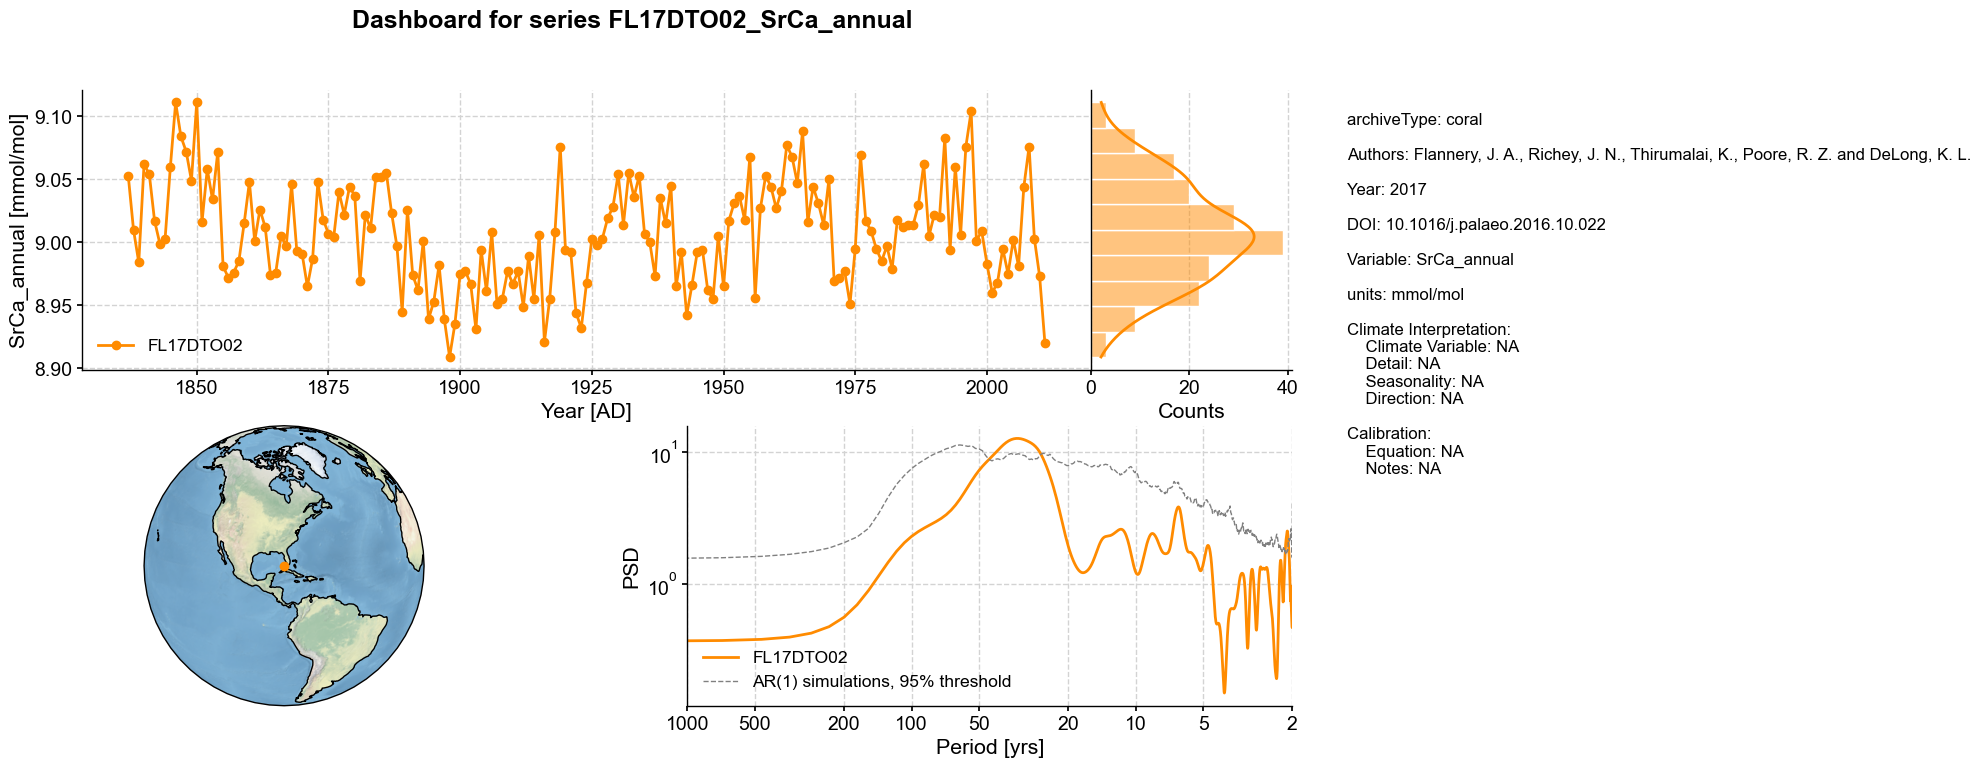

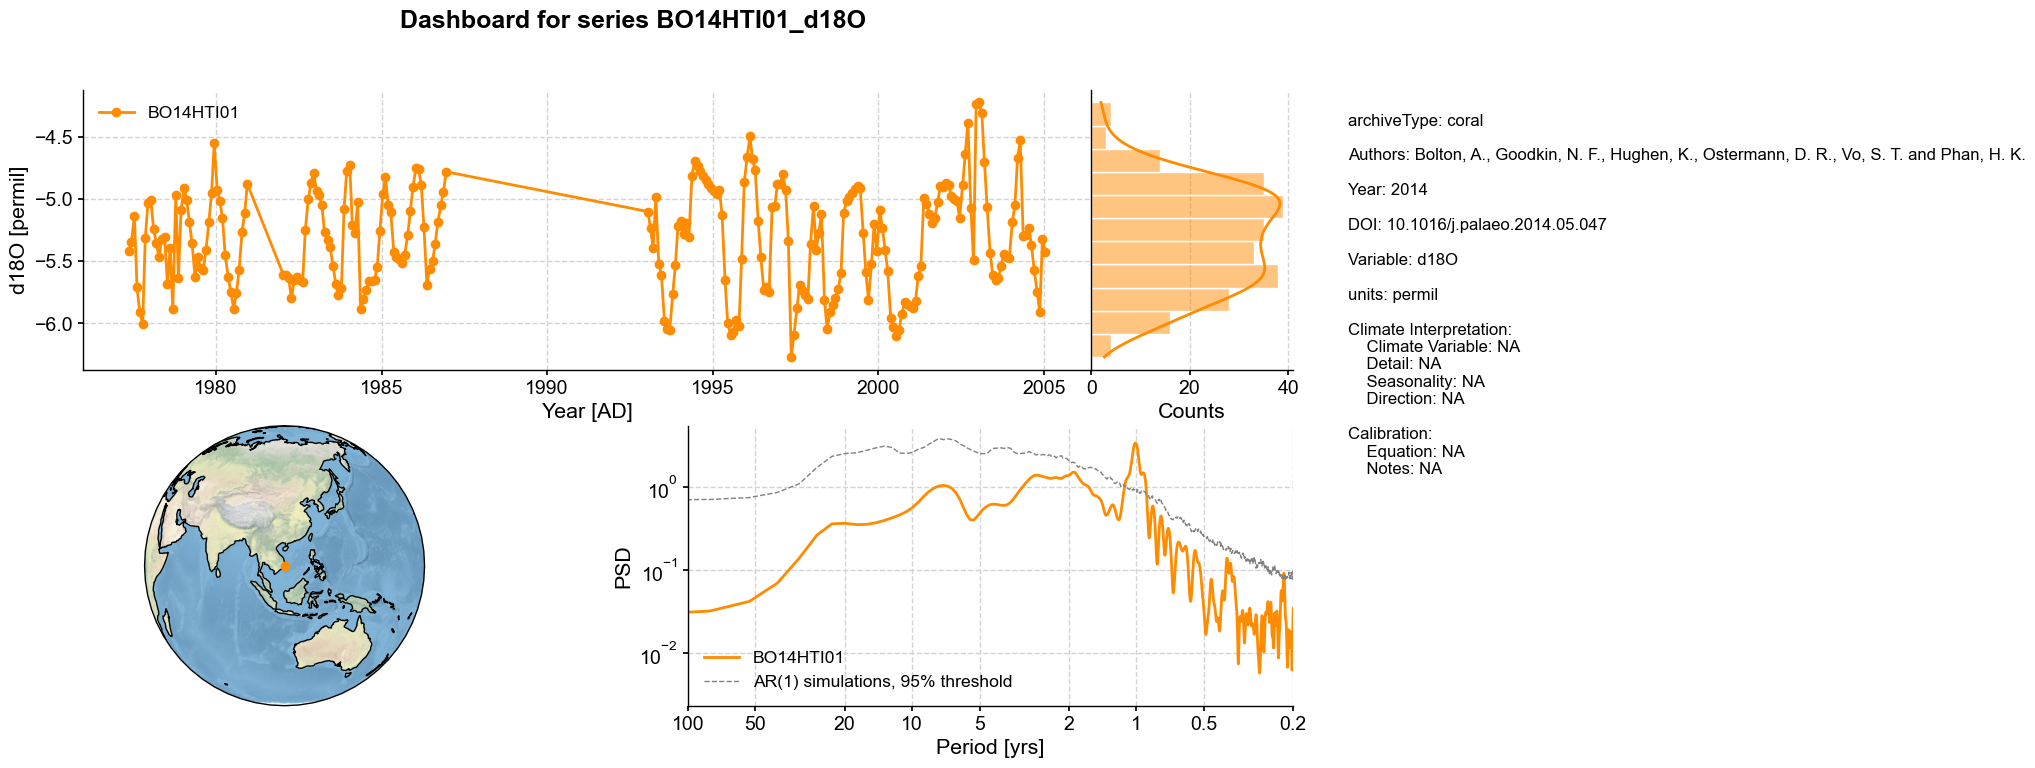

In [11]:
version = '0_5_4'
for idx, ts in enumerate(ts_list_noyear[:5]):
    ttl = ts.label + '_' + ts.value_name
    fig, ax = ts.dashboard()
    fig.suptitle('Dashboard for series ' + ttl,fontweight='bold',fontsize=18)
    fig.savefig('./dashboards/ch2k_'+version+ '_'+ ttl +'.png',
                dpi=200,bbox_inches = 'tight')

Most of these records have a very pronounced seasonal cycle that it might be wise to remove pior to analysis. The [cfr](https://fzhu2e.github.io/cfr/) package makes this, and other visualizations, very easy.

## 3. Exploring with `cfr`

CFR stands for "Climate Field Reconstruction", but the package also includes very useful utilities to load, process and visualize the data. To install it, follow these [instructions](https://fzhu2e.github.io/cfr/ug-installation.html).

In [1]:
import cfr
import pandas as pd

### Load the dataset

We load the database as a [pandas](https://pandas.pydata.org) dataframe. The pkl file was made in notebook "ch2k-lipd2df.ipynb":

In [3]:
df = pd.read_pickle('./ch2k.pkl')
df.head()

,datasetId,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_notes
0,ch2kKA17RYU01,KA17RYU01,coral,-3.5,28.3,130.0,"[1578.58, 1579.08, 1579.58, 1580.08, 1580.58, ...",AD,SrCa,mmol/mol,"[8.802, 9.472, 8.825, 9.355, 8.952, 9.297, 8.8...",Core data is a composite of overlapping indivi...
2,ch2kCH18YOA02,CH18YOA02,coral,NaN,16.448,111.605,"[1987.92, 1988.085, 1988.25, 1988.42, 1988.585...",AD,SrCa,mmol/mol,"[8.58, 8.683, 8.609, 8.37, 8.38, 8.417, 8.584,...",Microatoll; coral rubble samples; data reporte...
4,ch2kFL17DTO02,FL17DTO02,coral,-3.0,24.699,-82.799,"[1837.04, 1837.13, 1837.21, 1837.29, 1837.38, ...",AD,SrCa,mmol/mol,"[9.159, 9.257, 9.245, 9.166, 9.045, 9.013, 8.9...",NaN
6,ch2kFL17DTO02,FL17DTO02,coral,-3.0,24.699,-82.799,"[1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842....",AD,SrCa_annual,mmol/mol,"[9.053, 9.01, 8.984, 9.062, 9.054, 9.017, 8.99...",NaN
8,ch2kBO14HTI01,BO14HTI01,coral,-3.6,12.21,109.31,"[1977.37, 1977.45, 1977.54, 1977.62, 1977.7, 1...",AD,d18O,permil,"[-5.4206, -5.3477, -5.1354, -5.7119, -5.9058, ...",A composite of cores TN and BB (CoralHydro2k I...


### Create a `cfr.ProxyDatabase` object

From a dataframe, `cfr` can load the data into a "paleodatabase" object, which has a few nice features:

In [4]:
pdb = cfr.ProxyDatabase().from_df(
    df,
    proxy_type_column='paleoData_variableName',
    pid_column='datasetId',
)

### Visualize the spatiotemporal availability of the records
We can visualize spatiotemporal availability in just one line of code (two if you need to tweak the x axis):

In [5]:
fig, ax = pdb.plot(plot_count=True)
ax['count'].set_xlim(1000, 2000)

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

Error in callback <function _draw_all_if_interactive at 0x1b3f05dc0> (for post_execute):


AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

<Figure size 720x720 with 1 Axes>

### Check site IDs with an interactive map

In [7]:
# to check site IDs
pdb.plotly()

### Check a specific record

If you wanted to load and explore a specific record, you can just pass its ID as an argument of pdb, and it has an associated plot method (space and time together).

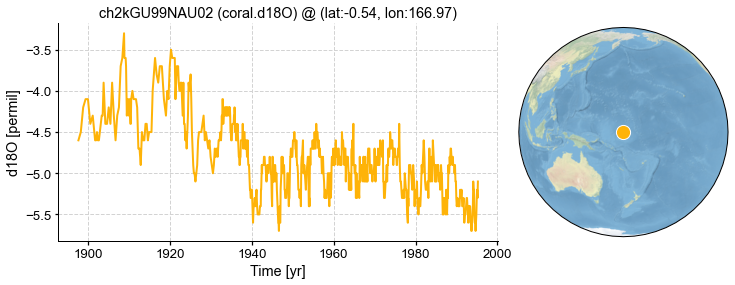

In [8]:
pobj = pdb['ch2kGU99NAU02']
fig, ax = pobj.plot()

If all you want is the timeseries, do:

In [ ]:
fig, ax = pobj.plot(plot_map=False)

In [9]:
# to confirm the data is sub-annual
pobj.dt

0.09999999999990905

### Seasonalize the record

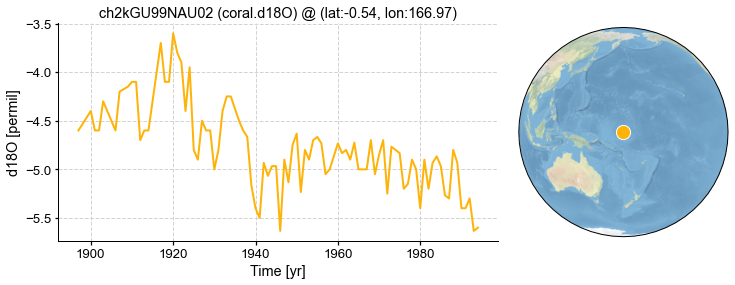

In [10]:
pobj_JJA = pobj.annualize(months=[6, 7, 8])
fig, ax = pobj_JJA.plot()